In [1]:
#package imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [51]:
#seaborn plot size settings
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
#import csv
df_raw = pd.read_csv('netflix_titles.csv')
df_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#presence of null values in columns
df_raw.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [5]:
for col in df_raw.columns:
    print("Column " + col + " has " + str(df_raw[col].isnull().sum()) + " null values out of " + str(len(df_raw[col])))

Column show_id has 0 null values out of 7787
Column type has 0 null values out of 7787
Column title has 0 null values out of 7787
Column director has 2389 null values out of 7787
Column cast has 718 null values out of 7787
Column country has 507 null values out of 7787
Column date_added has 10 null values out of 7787
Column release_year has 0 null values out of 7787
Column rating has 7 null values out of 7787
Column duration has 0 null values out of 7787
Column listed_in has 0 null values out of 7787
Column description has 0 null values out of 7787


Column 'director' has most amount of nulls in the dataset. Followed by 'cast' and then 'country' columns

In [6]:
#dropping rows with null values
df_raw.dropna(inplace=True)

In [7]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/Users/krishnasreenivas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


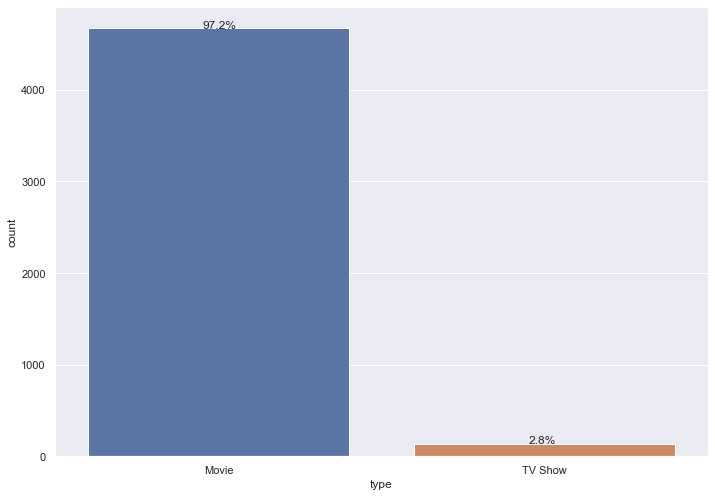

In [8]:
ax = sns.countplot('type', data = df_raw)
without_hue(ax, df_raw.type)

As per the plot above, most of the content are movies.

In [35]:
ShowsbyCountry = pd.DataFrame(df_raw.groupby('country')['show_id'].count())
ShowsbyCountry.reset_index(inplace=True)
ShowsbyCountry.sort_values(by=['show_id'], ascending=False, inplace=True)
ShowsbyCountry.rename(columns = {'show_id': 'counts'}, inplace=True)

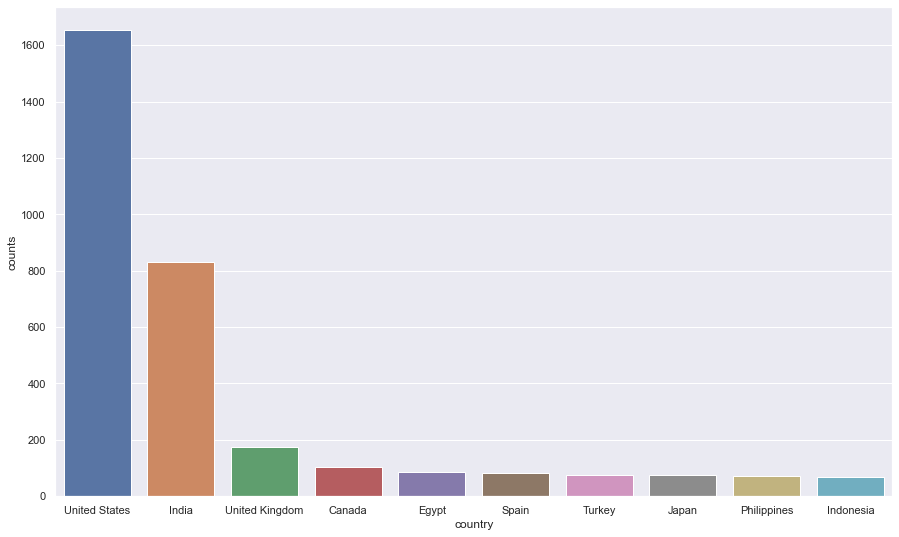

In [36]:
ax = sns.barplot(x = 'country', y = 'counts', data = ShowsbyCountry.head(10))

Most of the shows in Netflix are from the United States followed by India and the UK.

In [41]:
MoviesDf = df_raw[(df_raw['type'] == 'Movie') & (df_raw['release_year'] > 1990)]


/Users/krishnasreenivas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


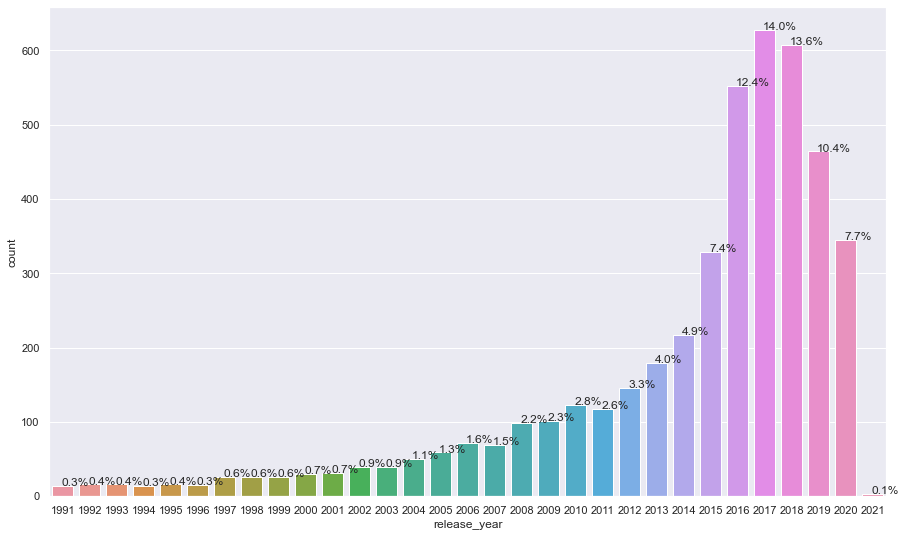

In [43]:
ax = sns.countplot('release_year', data = MoviesDf)
without_hue(ax, MoviesDf.release_year)

As we can see, about 14% of the movies are from year 2017, followed by 13.6% from 2018 and 12.4% from 2016.

/Users/krishnasreenivas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


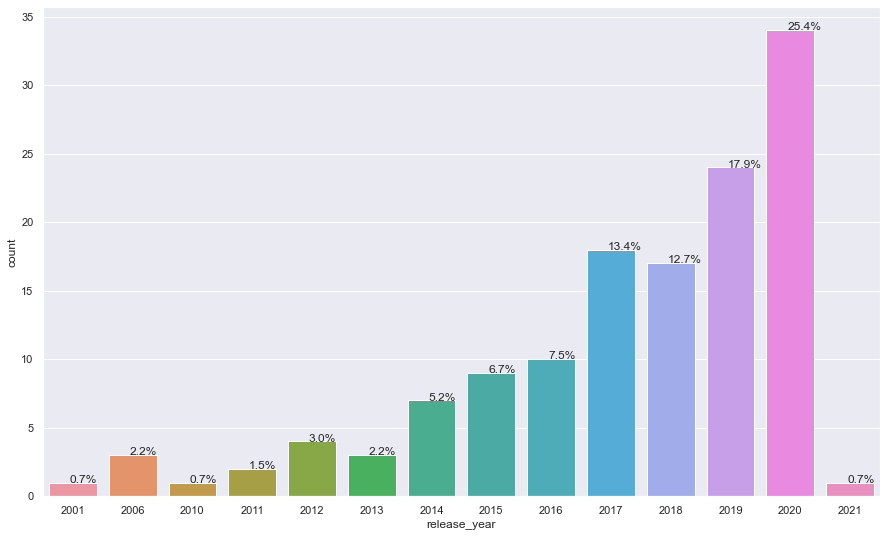

In [44]:
TVShowsDf = df_raw[(df_raw['type'] == 'TV Show') & (df_raw['release_year'] > 1990)]
ax = sns.countplot('release_year', data = TVShowsDf)
without_hue(ax, TVShowsDf.release_year)

But when it comes to TV shows, about 25.4% of the shows are latest i.e., from 2020 followed by 17.9% from 2019.

In [47]:
MoviesbyDirector = pd.DataFrame(df_raw.groupby('director')['show_id'].count())
MoviesbyDirector.reset_index(inplace=True)
MoviesbyDirector.sort_values(by=['show_id'], ascending=False, inplace=True)
MoviesbyDirector.rename(columns = {'show_id': 'counts'}, inplace=True)

In [53]:
MoviesbyDirector.head()

,director,counts
2736,"Raúl Campos, Jan Suter",18
2065,Marcus Raboy,15
1435,Jay Karas,14
557,Cathy Garcia-Molina,13
2122,Martin Scorsese,12


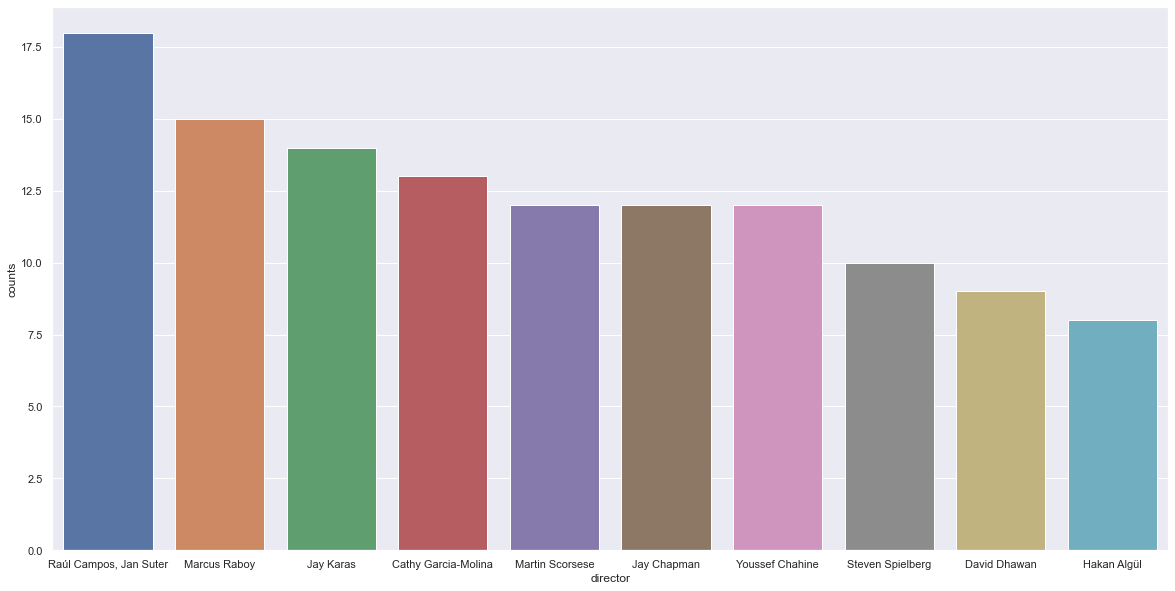

In [52]:
ax = sns.barplot(x = 'director', y = 'counts', data = MoviesbyDirector.head(10))

Most of the movies(about 18) are directed by Raul Campos followed by Marcus Raboy at 15.

/Users/krishnasreenivas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


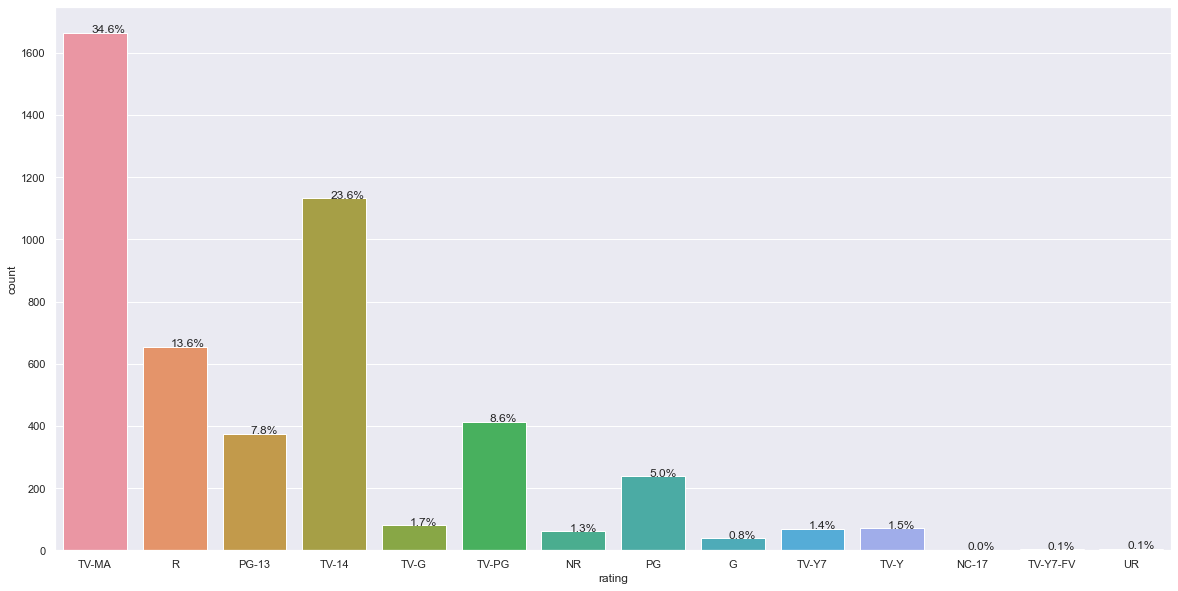

In [54]:
ax = sns.countplot('rating', data = df_raw)
without_hue(ax, df_raw.release_year)

About 34.6% of the content on Netflix either Movie or TV Show are for mature audience (TV-MA) only followed by 23.6% of shows rated TV-14.

/Users/krishnasreenivas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


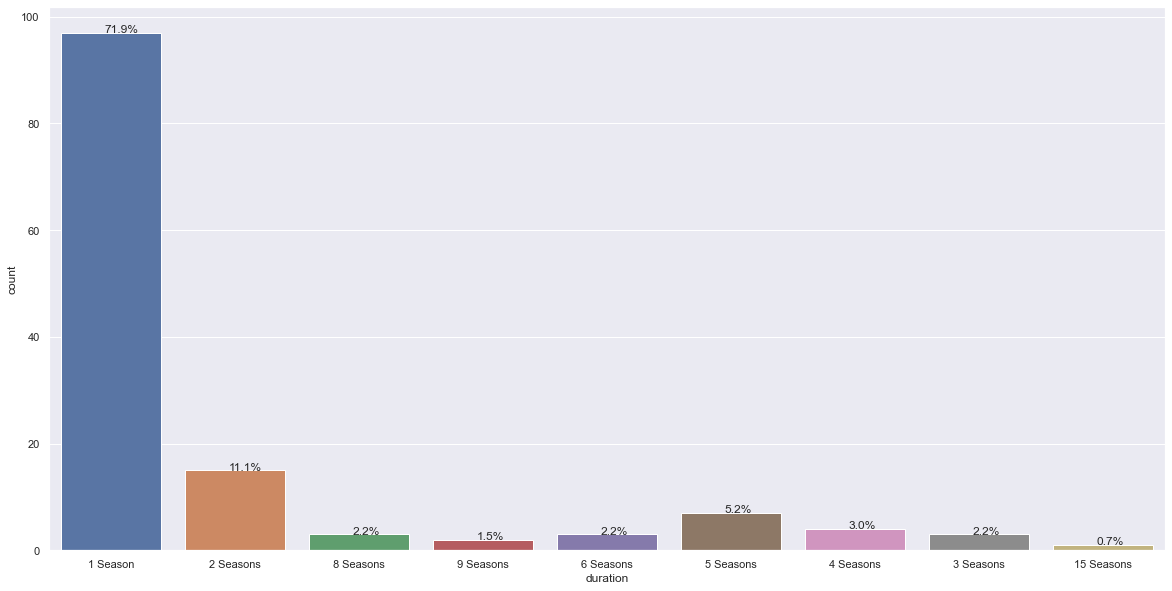

In [62]:
TVData = df_raw[df_raw['type'] == 'TV Show']
ax = sns.countplot('duration', data = TVData)
without_hue(ax, TVData.duration)

About 71.9% of the TV Shows on Netflix are in their first season followed by 11.1% of shows in their second season.